<a href="https://colab.research.google.com/github/cesarrivera52/Concentracion2/blob/main/Evaluaci%C3%B3n/An%C3%A1lisisExactitud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from pandas import DataFrame

setInicial=pd.read_csv('Vinos.csv')
#Dividir el conjunto de datos y clase
inicialDatos=setInicial.drop('quality',axis=1)
inicialClase=setInicial['quality'] #clase

print('Conjunto de datos inicial: \n\n',inicialClase.value_counts())


Conjunto de datos inicial: 

 quality
Cat_5    681
Cat_7    199
Name: count, dtype: int64


# Extraer conjunto de entrenamiento y conjunto de evaluación

In [ ]:
from sklearn.model_selection import train_test_split

entrenamientoDatos, evaluacionDatos, entrenamientoClase, evaluacionClase=\
train_test_split(inicialDatos, inicialClase, test_size=0.3,stratify=inicialClase)

print('Datos de entrenamiento: \n',entrenamientoClase.value_counts())
print('\nDatos de evaluación: \n',evaluacionClase.value_counts())

Datos de entrenamiento: 
 quality
Cat_5    477
Cat_7    139
Name: count, dtype: int64

Datos de evaluación: 
 quality
Cat_5    204
Cat_7     60
Name: count, dtype: int64


# **Generación del Modelo**
*Arbol*

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

profundidad=[1,2,3,4,5,6,7,8]
exactitud=[]
exactitudTrain=[]
for x in profundidad:
  clasificador=DecisionTreeClassifier(criterion='entropy', max_depth=x)

##### Generar modelo
  modelo=clasificador.fit(entrenamientoDatos,entrenamientoClase)

### Clasificacion
  ClaseAsignada=modelo.predict(evaluacionDatos)
  ClaseAsignadaTrain=modelo.predict(entrenamientoDatos)

### Evaluar
  exactitud.append(accuracy_score(evaluacionClase,ClaseAsignada))
  exactitudTrain.append(accuracy_score(entrenamientoClase,ClaseAsignadaTrain))


## **Evaliación del modelo**

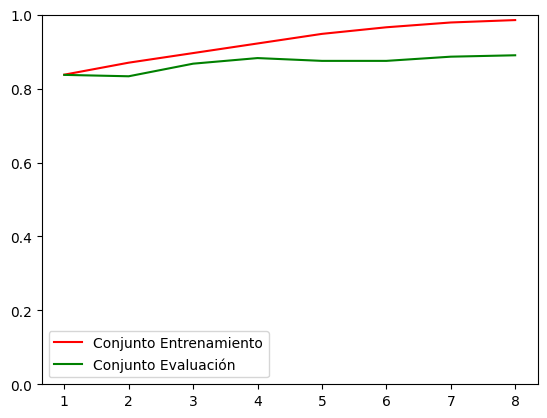

In [ ]:
import matplotlib.pyplot as plt
plt.plot(profundidad,exactitudTrain,color='red',label='Conjunto Entrenamiento')
plt.plot(profundidad,exactitud,color='green',label='Conjunto Evaluación')
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
print('Clase Real:  ',entrenamientoClase.head(1))
print('Clase Predicción:  ',ClaseAsignadaTrain[0])

Clase Real:   631    Cat_5
Name: quality, dtype: object
Clase Predicción:   Cat_5


# **Generación del Modelo**
*KNN*

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #Permite utilizar el clasificador K-NN

#1. Datos del modelo
clasificador= KNeighborsClassifier(n_neighbors=7) #Si no se le agrega nada dentro de los parentesis, por defecto es la distancia euclidiana y k=5
print(clasificador)

exactitud1=[]
profundidad1=[1,2,3,4,5,6,7,8,9]
exactitudTrain1=[]

for x in profundidad1:
  clasificador= KNeighborsClassifier(n_neighbors=x)
##### Generar modelo
  modelo=clasificador.fit(entrenamientoDatos,entrenamientoClase)

### Clasificacion
  ClaseAsignada=modelo.predict(evaluacionDatos)
  ClaseAsignadaTrain=modelo.predict(entrenamientoDatos)

### Evaluar
  exactitud1.append(accuracy_score(evaluacionClase,ClaseAsignada))
  exactitudTrain1.append(accuracy_score(entrenamientoClase,ClaseAsignadaTrain))


KNeighborsClassifier(n_neighbors=7)


## **Evaluación del modelo**

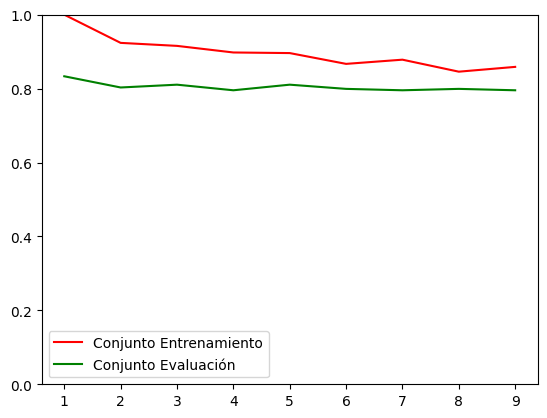

In [ ]:
import matplotlib.pyplot as plt
plt.plot(profundidad1,exactitudTrain1,color='red',label='Conjunto Entrenamiento')
plt.plot(profundidad1,exactitud1,color='green',label='Conjunto Evaluación')
plt.ylim(0,1)
plt.legend()
plt.show()

## Análisis de los modelos
**¿En qué clasificador se obtienen mejores resultados?**

En el modelo realizado de árbol de decisión es el que menor distancia tiene, entre el comportamiento de conjunto de entrenamiento y del conjunto de evaluación, es importante mencionar que la instancia que es mejor para este caso es la 4.

**¿Qué experimentos de cada clasificador cayeron en overfiting y underfiting? ¿Por que?**

En el experimento del clasificador


**¿Aplicarías estos modelos en la industria o seguirías buscando otras combinaciones para mejorar el resultado?**